In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [12, 8]

## Binning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

print(__doc__)

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100).reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
X_binned = enc.fit_transform(X)

Automatically created module for IPython interactive environment


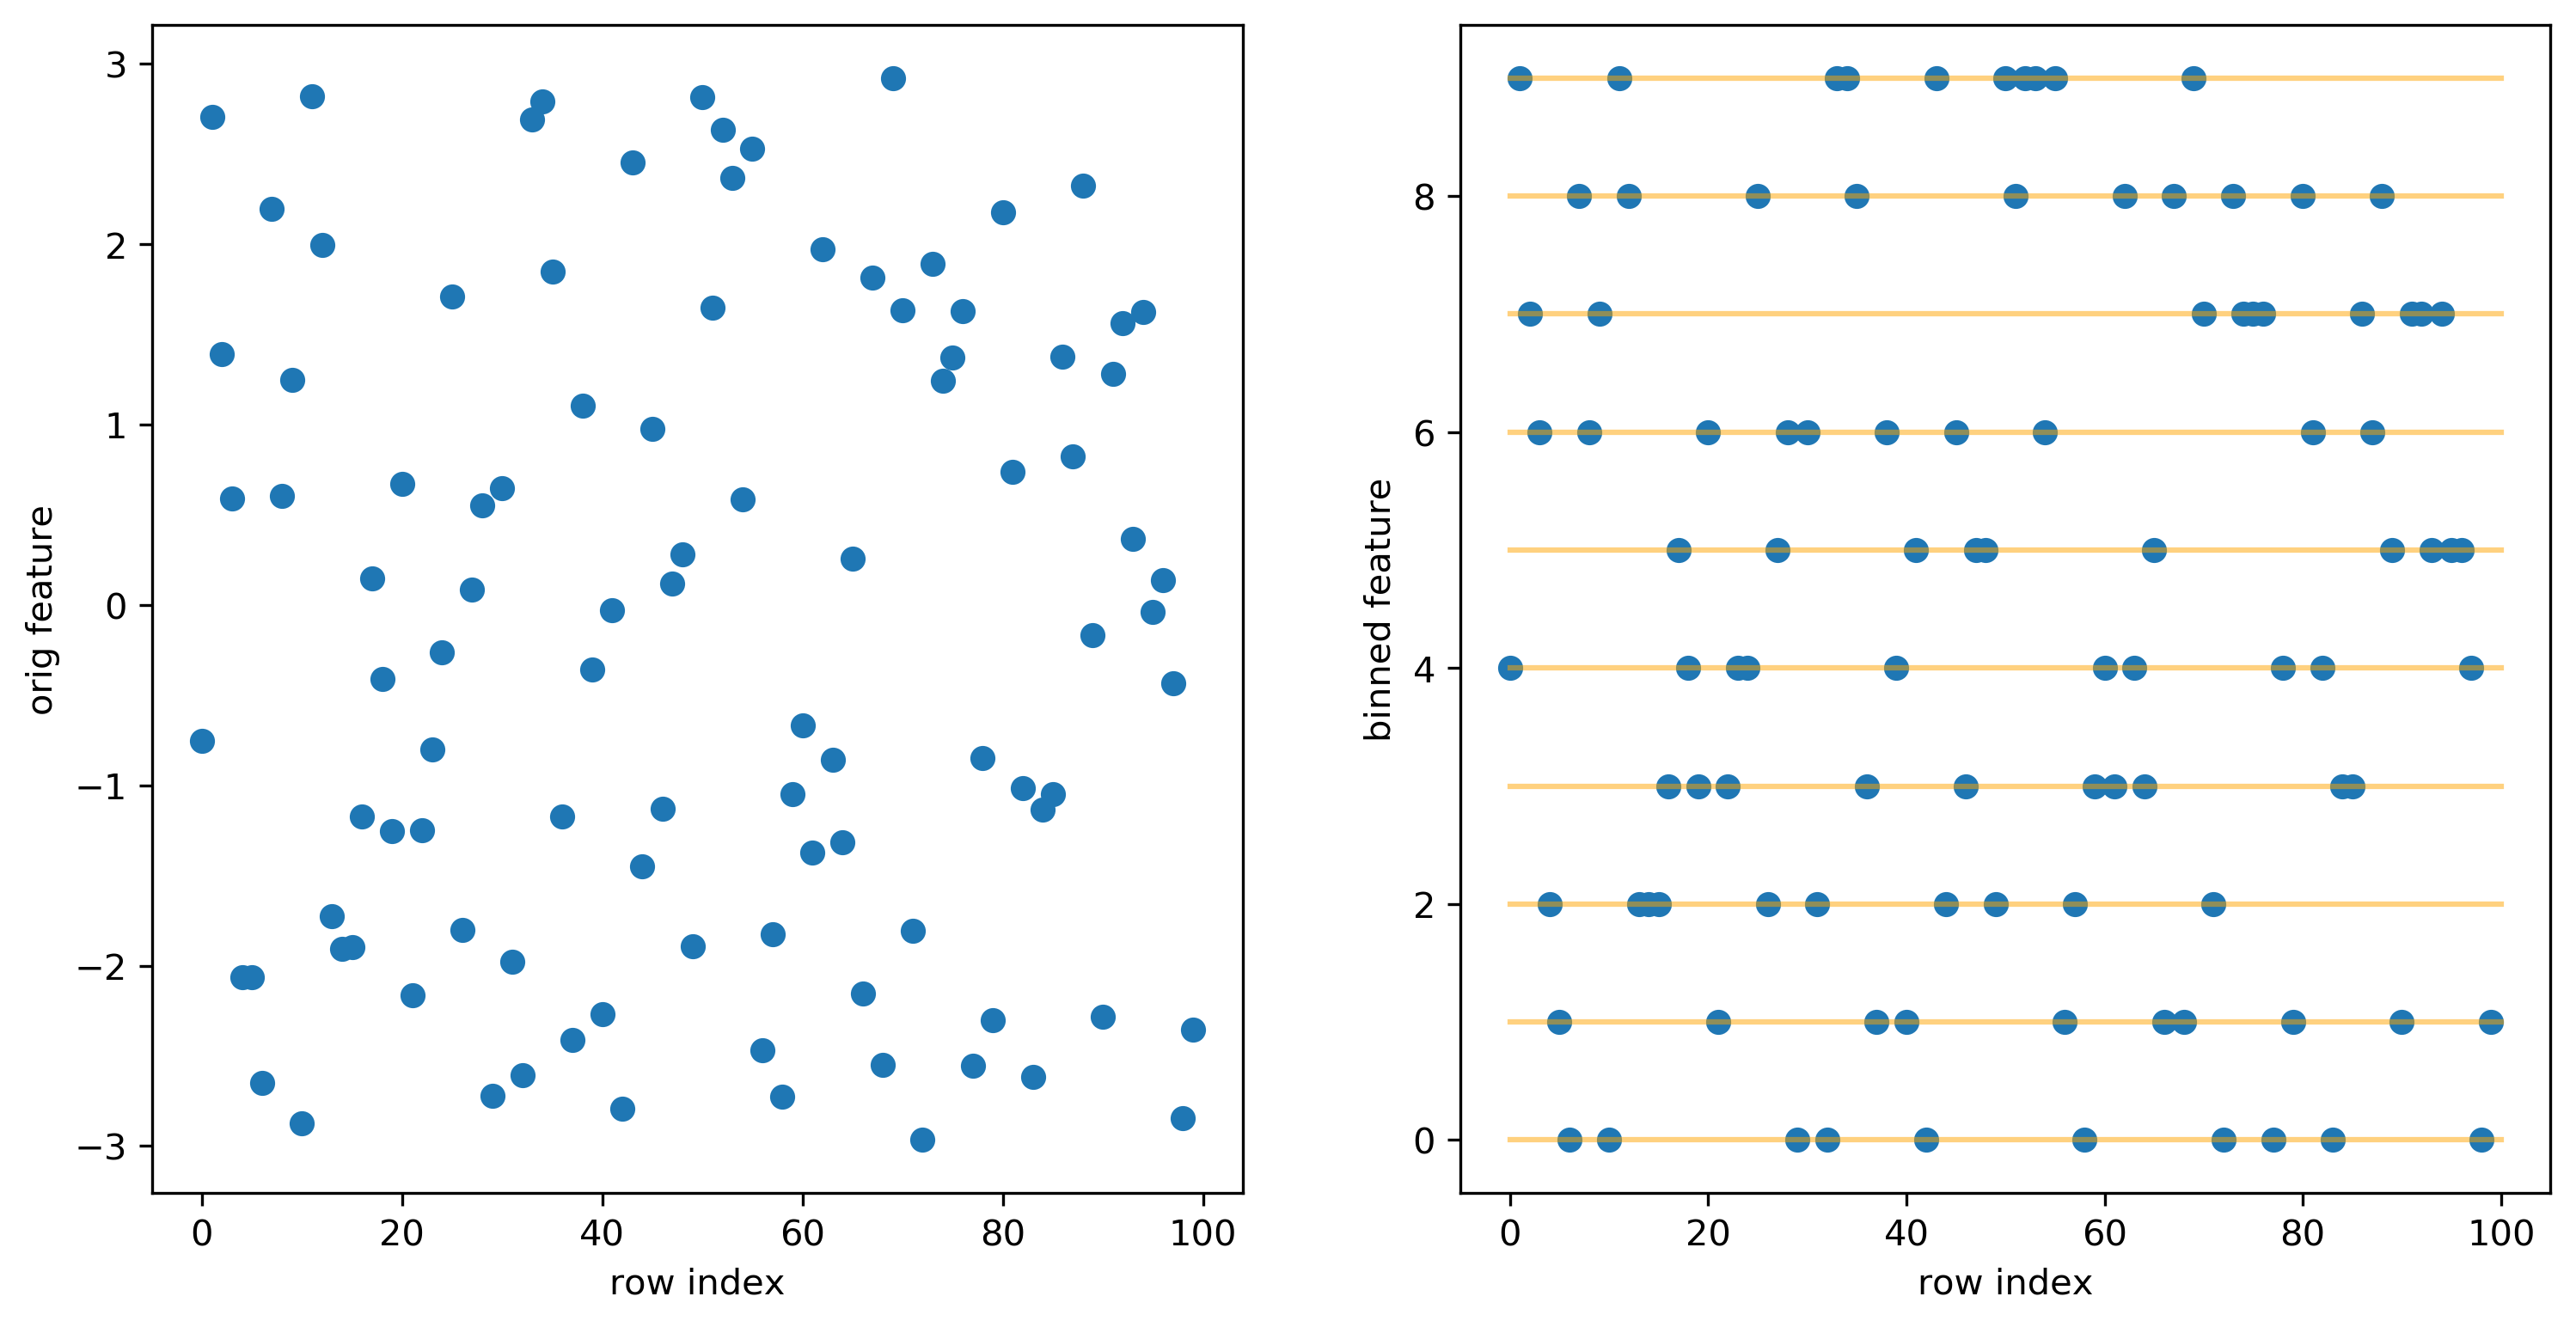

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(X, ls='', marker='o')
ax1.set(xlabel="row index",
        ylabel='orig feature')
ax2.plot(X_binned, ls='', marker='o')
ax2.set(xlabel="row index",
        ylabel="binned feature")
for i in range(10):
    ax2.plot([0, 100], [i, i], color='orange', alpha=0.5)
fig.set_dpi(300)

In [4]:
X.ravel()[:10]

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547])

In [5]:
X_binned.ravel()[:10]

array([4., 9., 7., 6., 2., 1., 0., 8., 6., 7.])

In [6]:
fig.savefig("binning101.png", transparent=True)

# Hyperparameter 

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)

In [8]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [10]:
import numpy as np
rounds = np.arange(20, 1000, 20, dtype=np.int)

## max_iter

In [11]:
plt.rcParams['font.size'] = 20

In [12]:
train_scores, test_scores = {}, {}

In [13]:
train_scores['default'] = np.empty_like(rounds, dtype=np.float)
test_scores['default'] = np.empty_like(rounds, dtype=np.float)

hist = HistGradientBoostingRegressor(warm_start=True)

for i in range(0, len(rounds)):
    hist.set_params(max_iter=rounds[i])
    hist.fit(X_train, y_train)
    train_scores['default'][i] = hist.score(X_train, y_train)
    test_scores['default'][i] = hist.score(X_test, y_test)

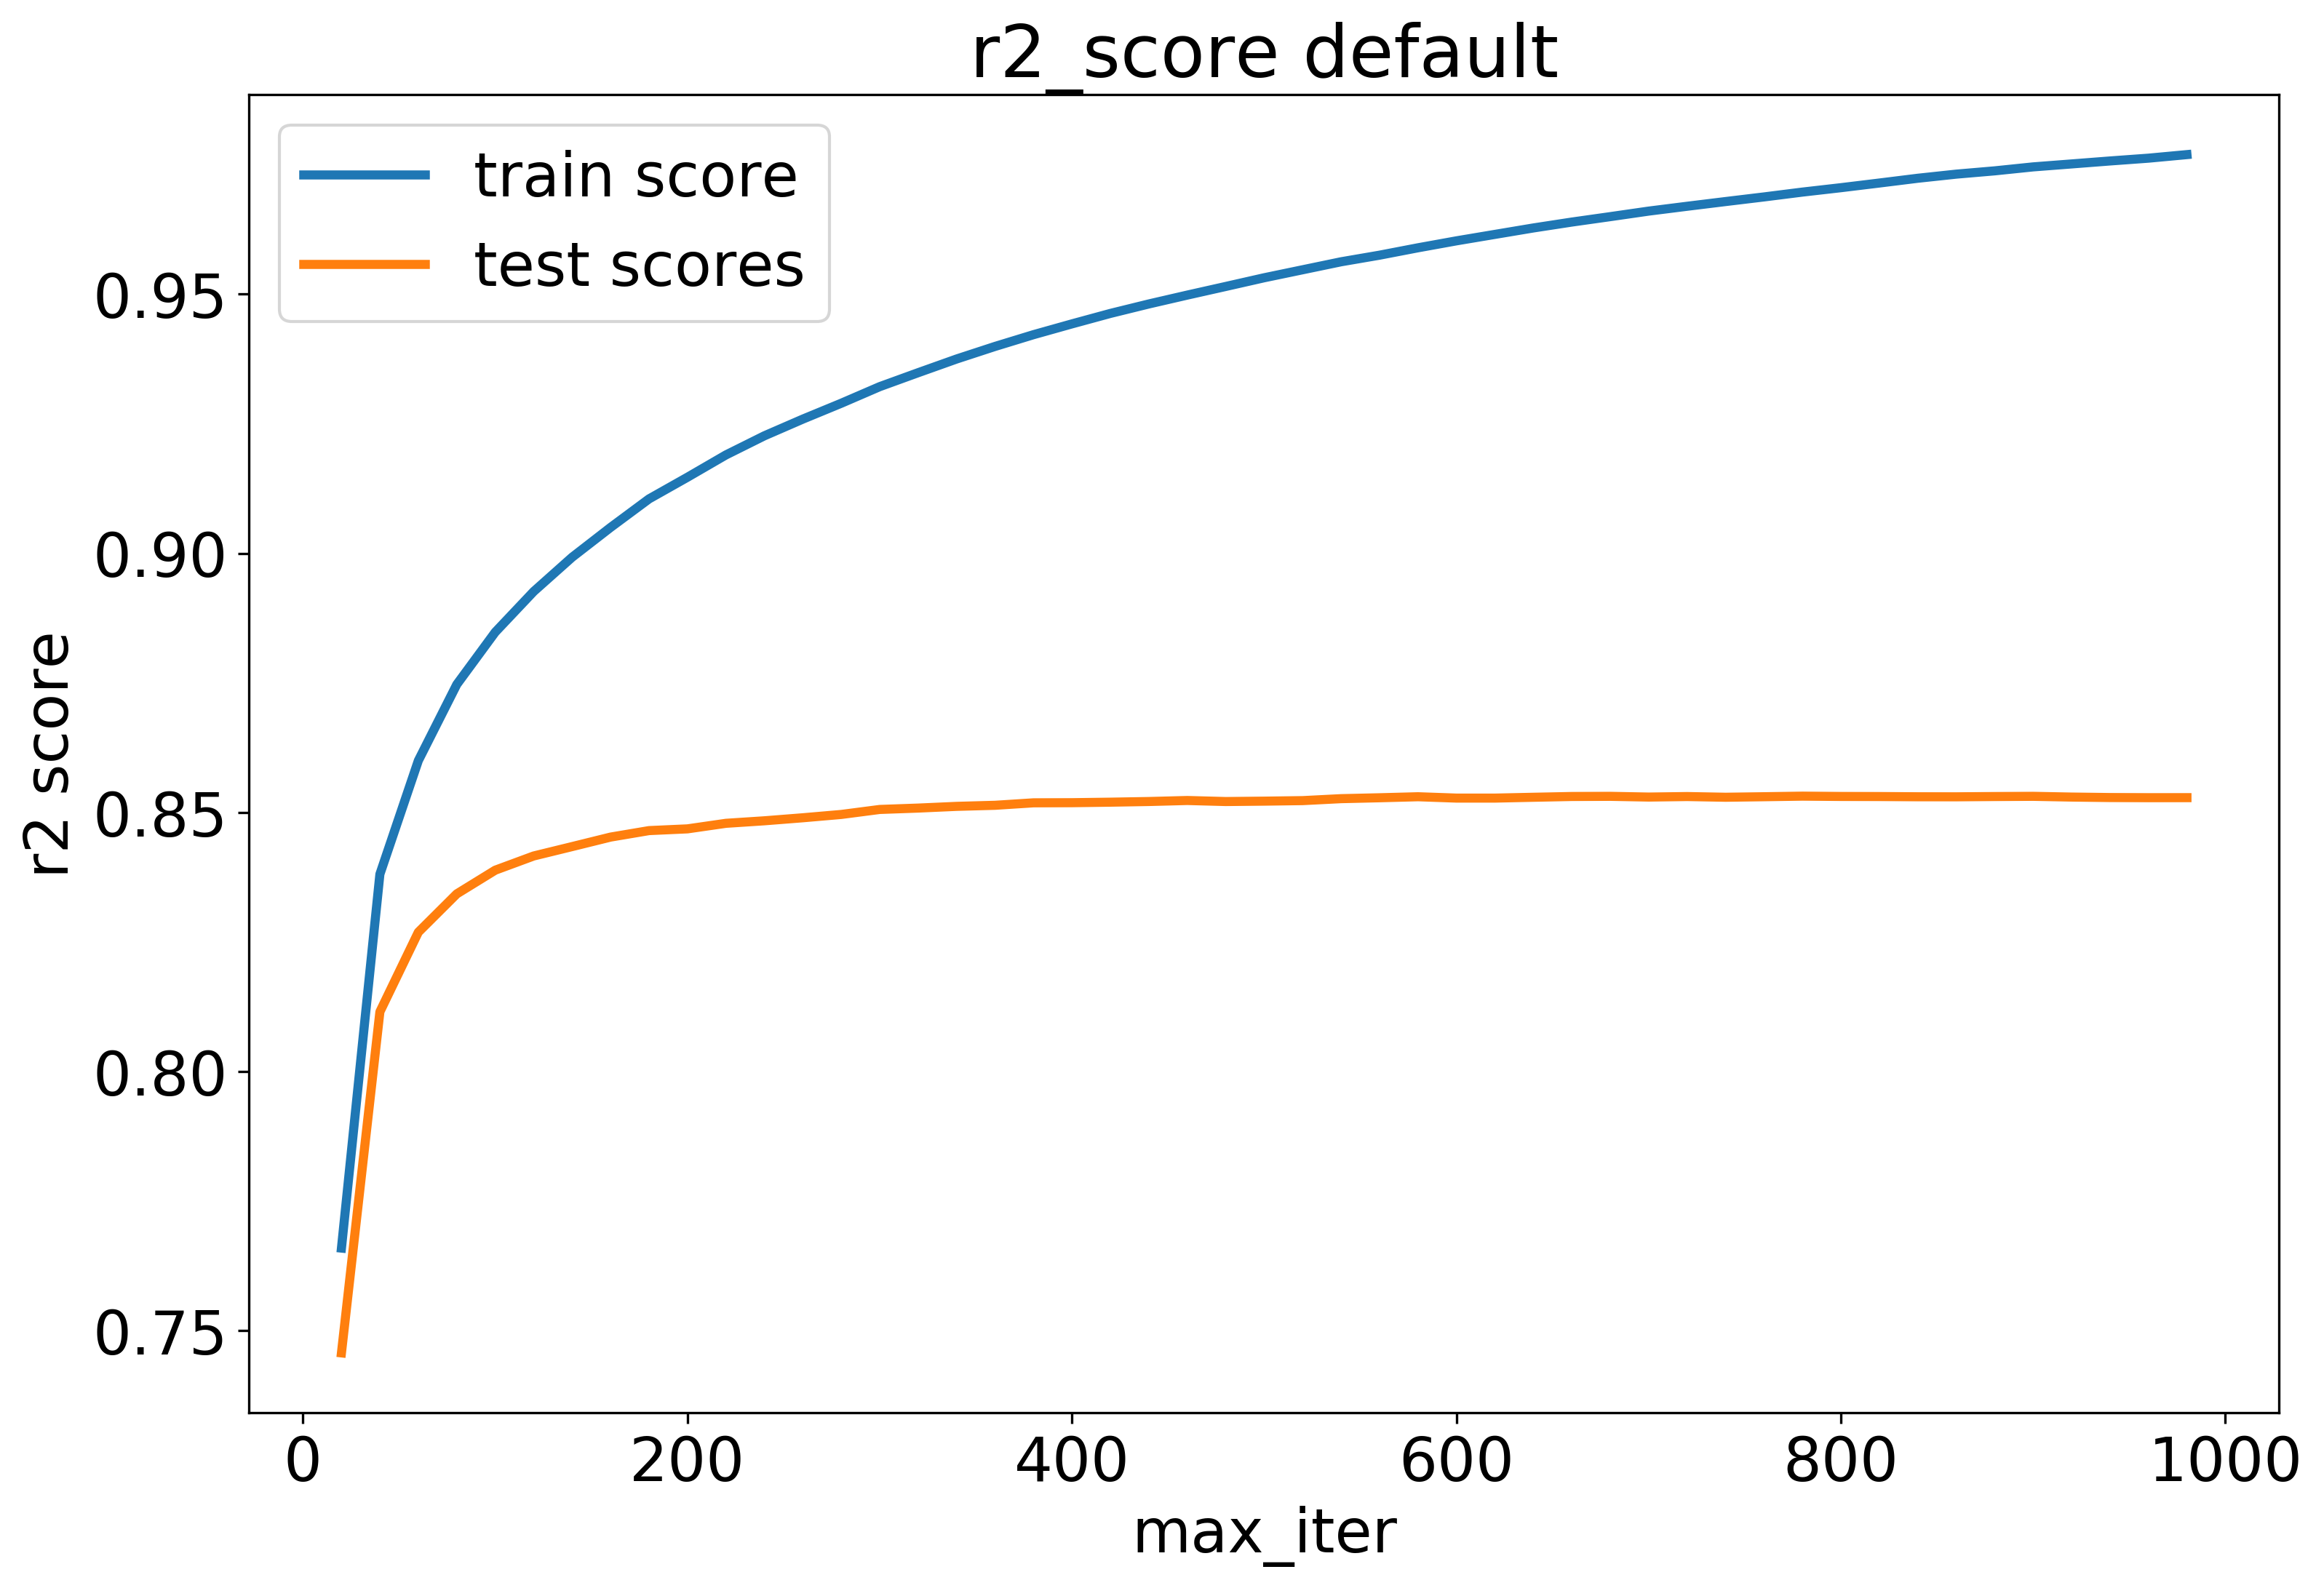

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(rounds, train_scores['default'], label="train score", lw=3)
ax.plot(rounds, test_scores['default'], label="test scores", lw=3)
fig.set_dpi(300)
ax.legend()
_ = ax.set(xlabel="max_iter", ylabel="r2 score", title="r2_score default")

In [15]:
fig.savefig("hyperp_default.png", transparent=True)

## learning_rate

In [16]:
def train_model(key, **kwargs):
    train_scores[key] = np.empty_like(rounds, dtype=np.float)
    test_scores[key] = np.empty_like(rounds, dtype=np.float)
    
    hist = HistGradientBoostingRegressor(warm_start=True, random_state=42, **kwargs)

    for i in range(0, len(rounds)):
        hist.set_params(max_iter=rounds[i])
        hist.fit(X_train, y_train)
        train_scores[key][i] = hist.score(X_train, y_train)
        test_scores[key][i] = hist.score(X_test, y_test)
        
    return hist

In [29]:
def plot_scores(key, default="default"):
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(rounds, train_scores[key], label="train score", c='blue', lw=3)
    ax.plot(rounds, test_scores[key], label="test scores", c='orange', lw=3)
    ax.plot(rounds, train_scores['default'], label="train score {}".format(default), c='blue', alpha=0.5, lw=2, linestyle='dashed')
    ax.plot(rounds, test_scores['default'], label="test scores {}".format(default), c='orange', alpha=0.5, lw=2, linestyle='dashed')
    fig.set_dpi(300)
    ax.legend(loc='lower right')
    _ = ax.set(xlabel="max_iter",
               ylabel="r2 score", title="r2_score with {}".format(key))
    return fig, ax 

In [23]:
train_model('learning_rate=0.5', learning_rate=0.5)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.5,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=980, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=42, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=True)

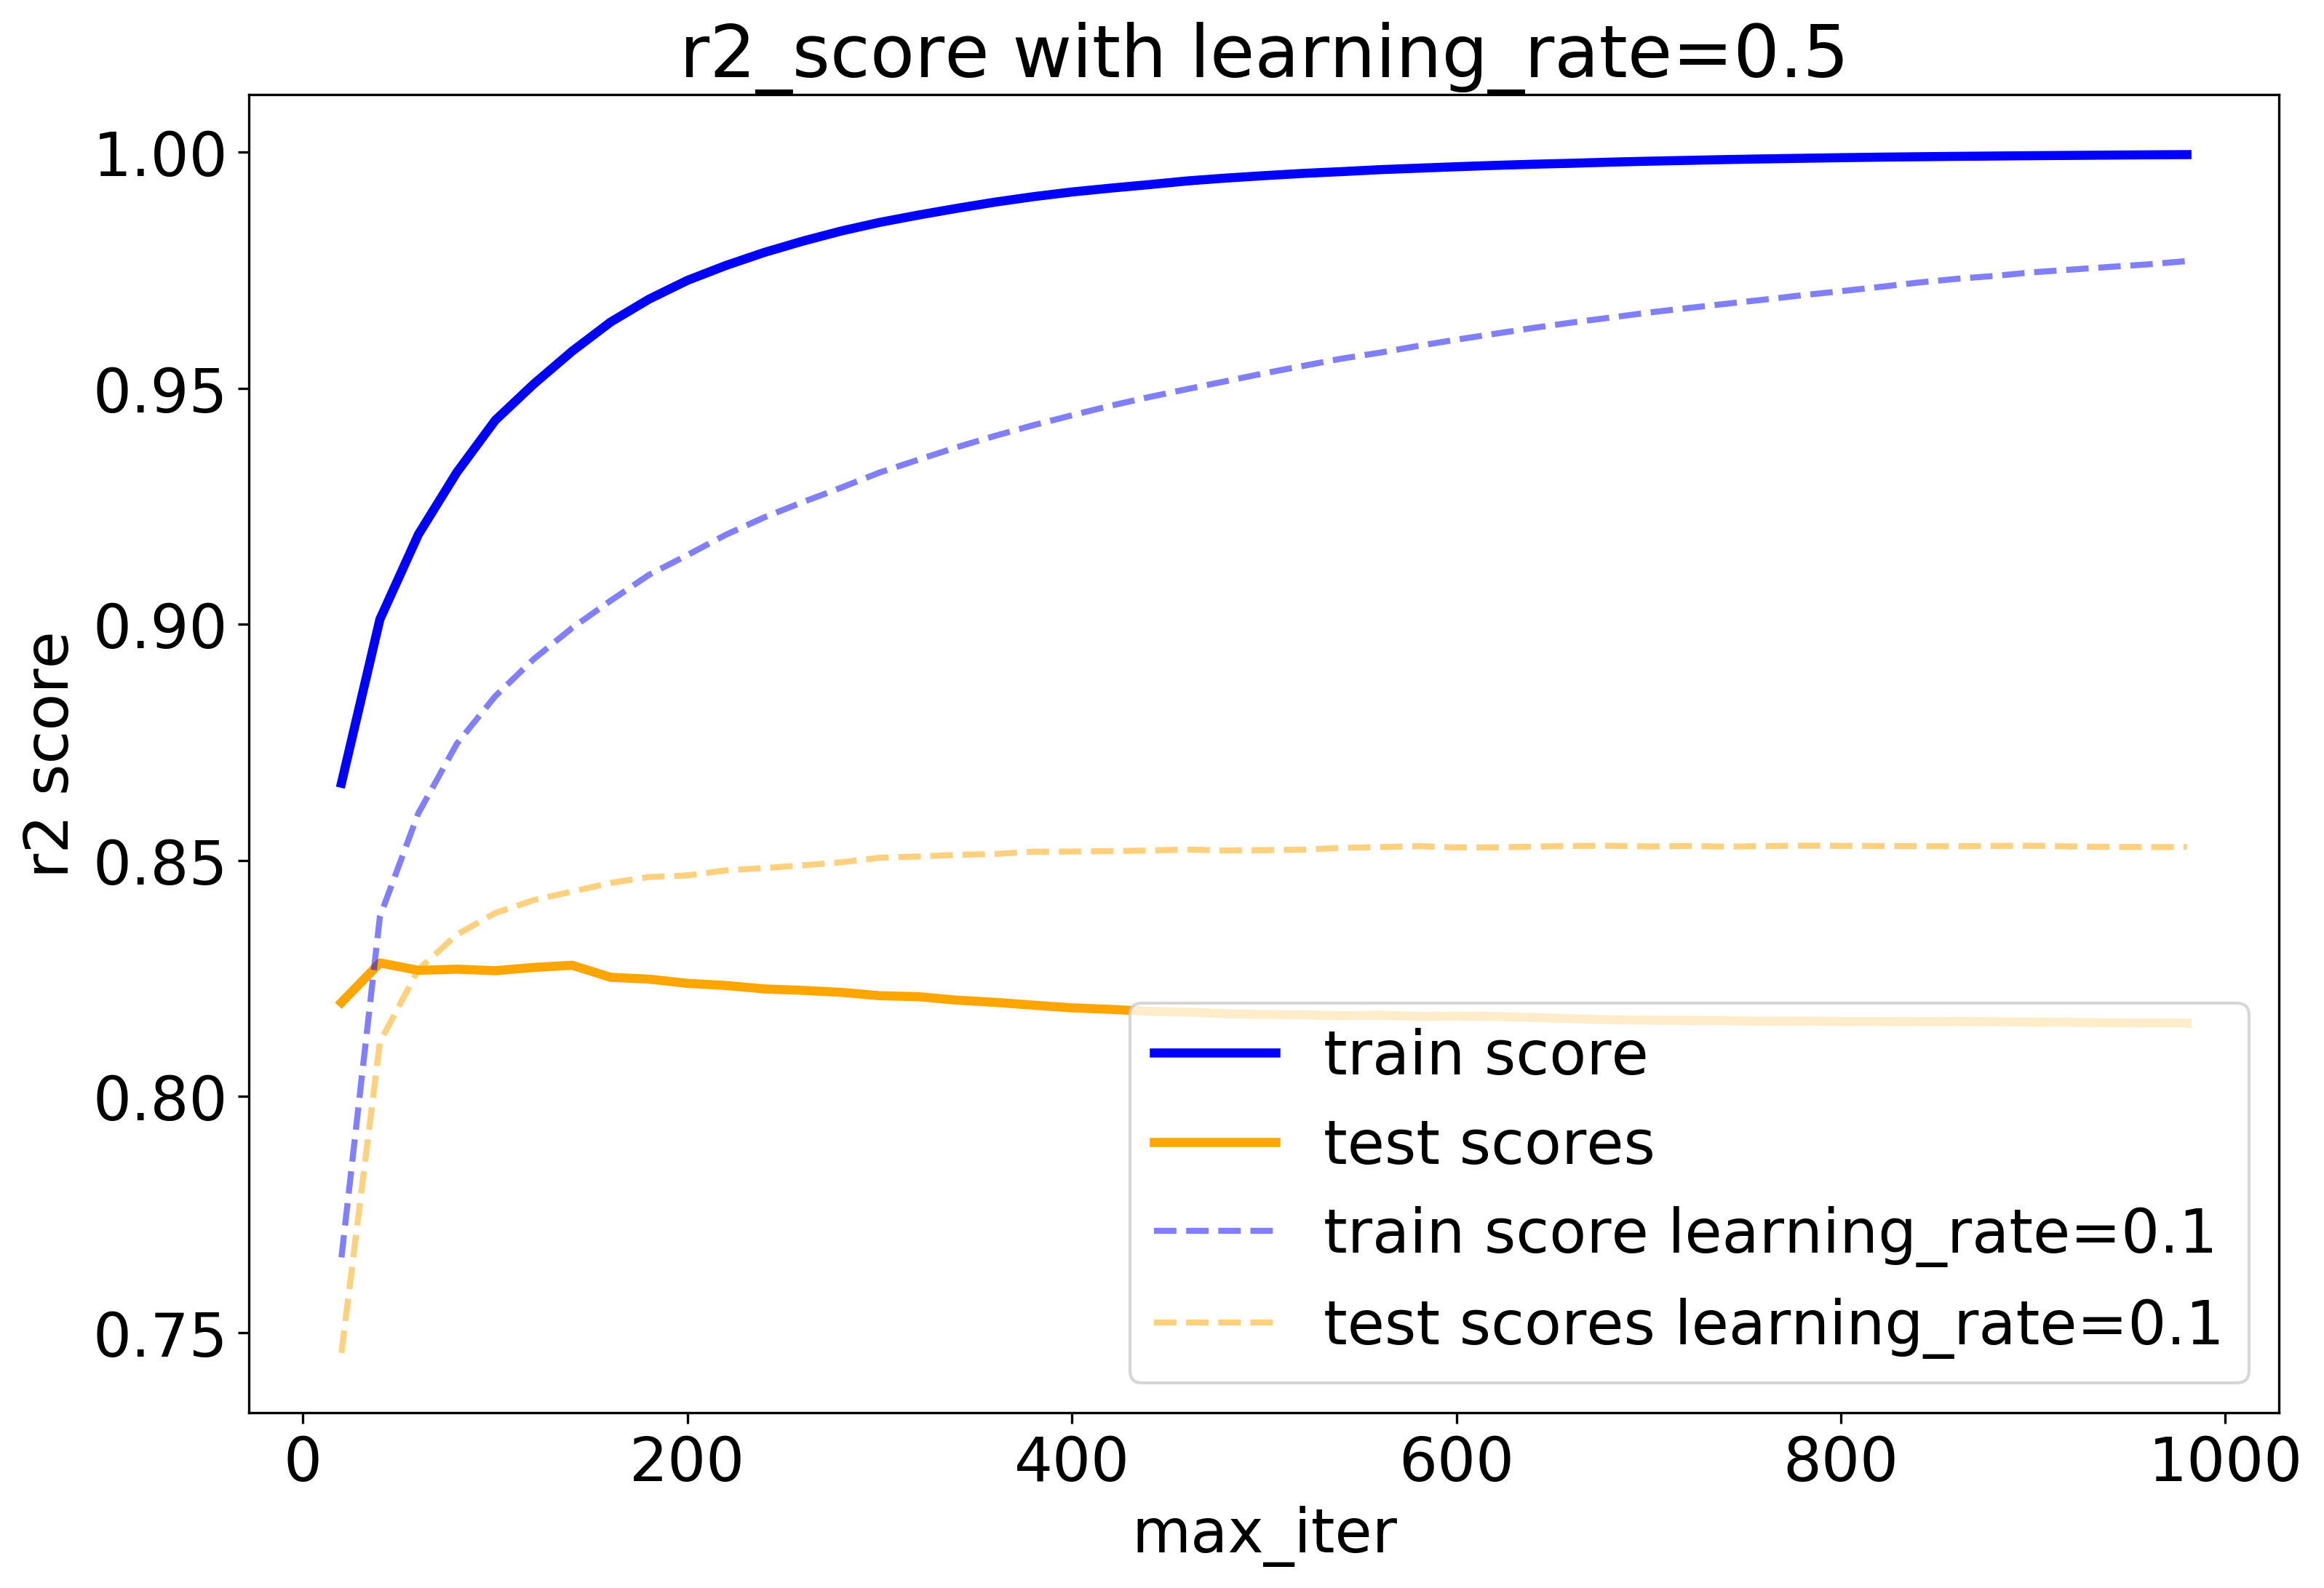

In [30]:
fig, ax = plot_scores('learning_rate=0.5', 'learning_rate=0.1')

In [31]:
fig.savefig("hyperp_learning_rate_05.png", transparent=True)

## max_leaf_nodes

In [32]:
train_model('max_leaf_nodes=200', max_leaf_nodes=200)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=980, max_leaf_nodes=200,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=42, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=True)

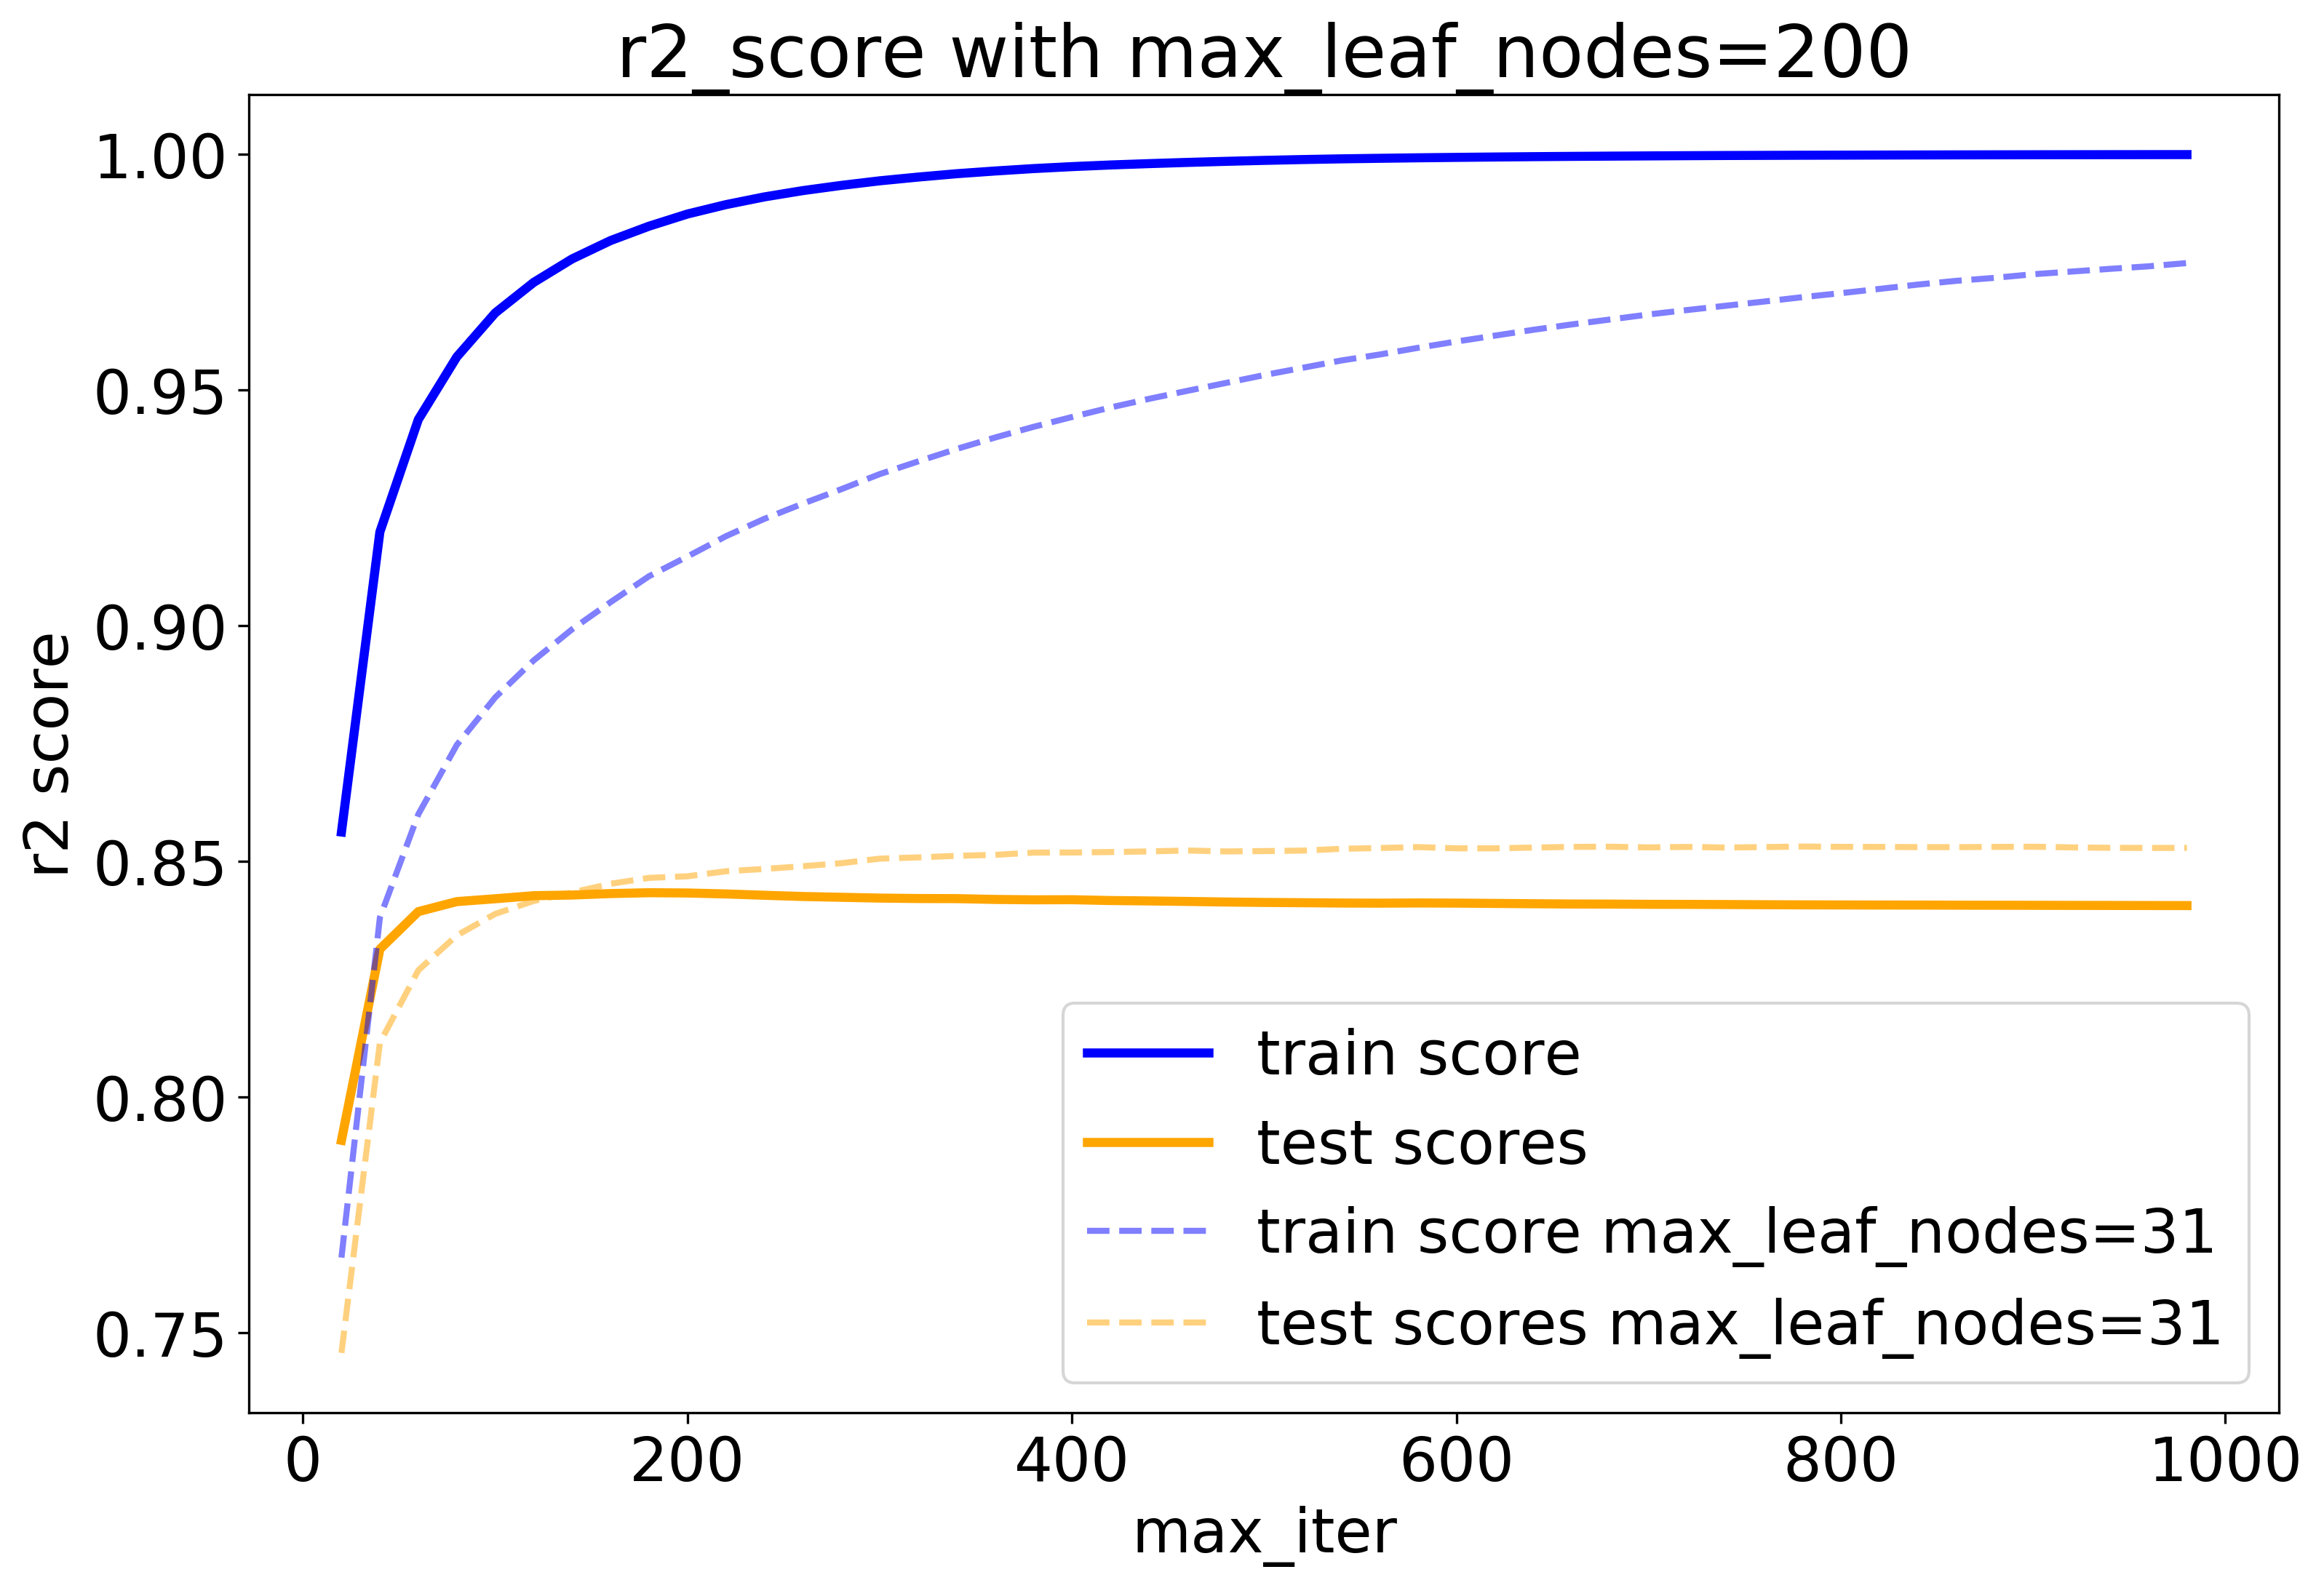

In [33]:
fig, ax = plot_scores('max_leaf_nodes=200', "max_leaf_nodes=31")

In [34]:
fig.savefig("hyperp_max_leaf_nodes_200.png", transparent=True)

## max_depth

In [35]:
train_model('max_depth=3', max_depth=3)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255, max_depth=3,
                              max_iter=980, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=42, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=True)

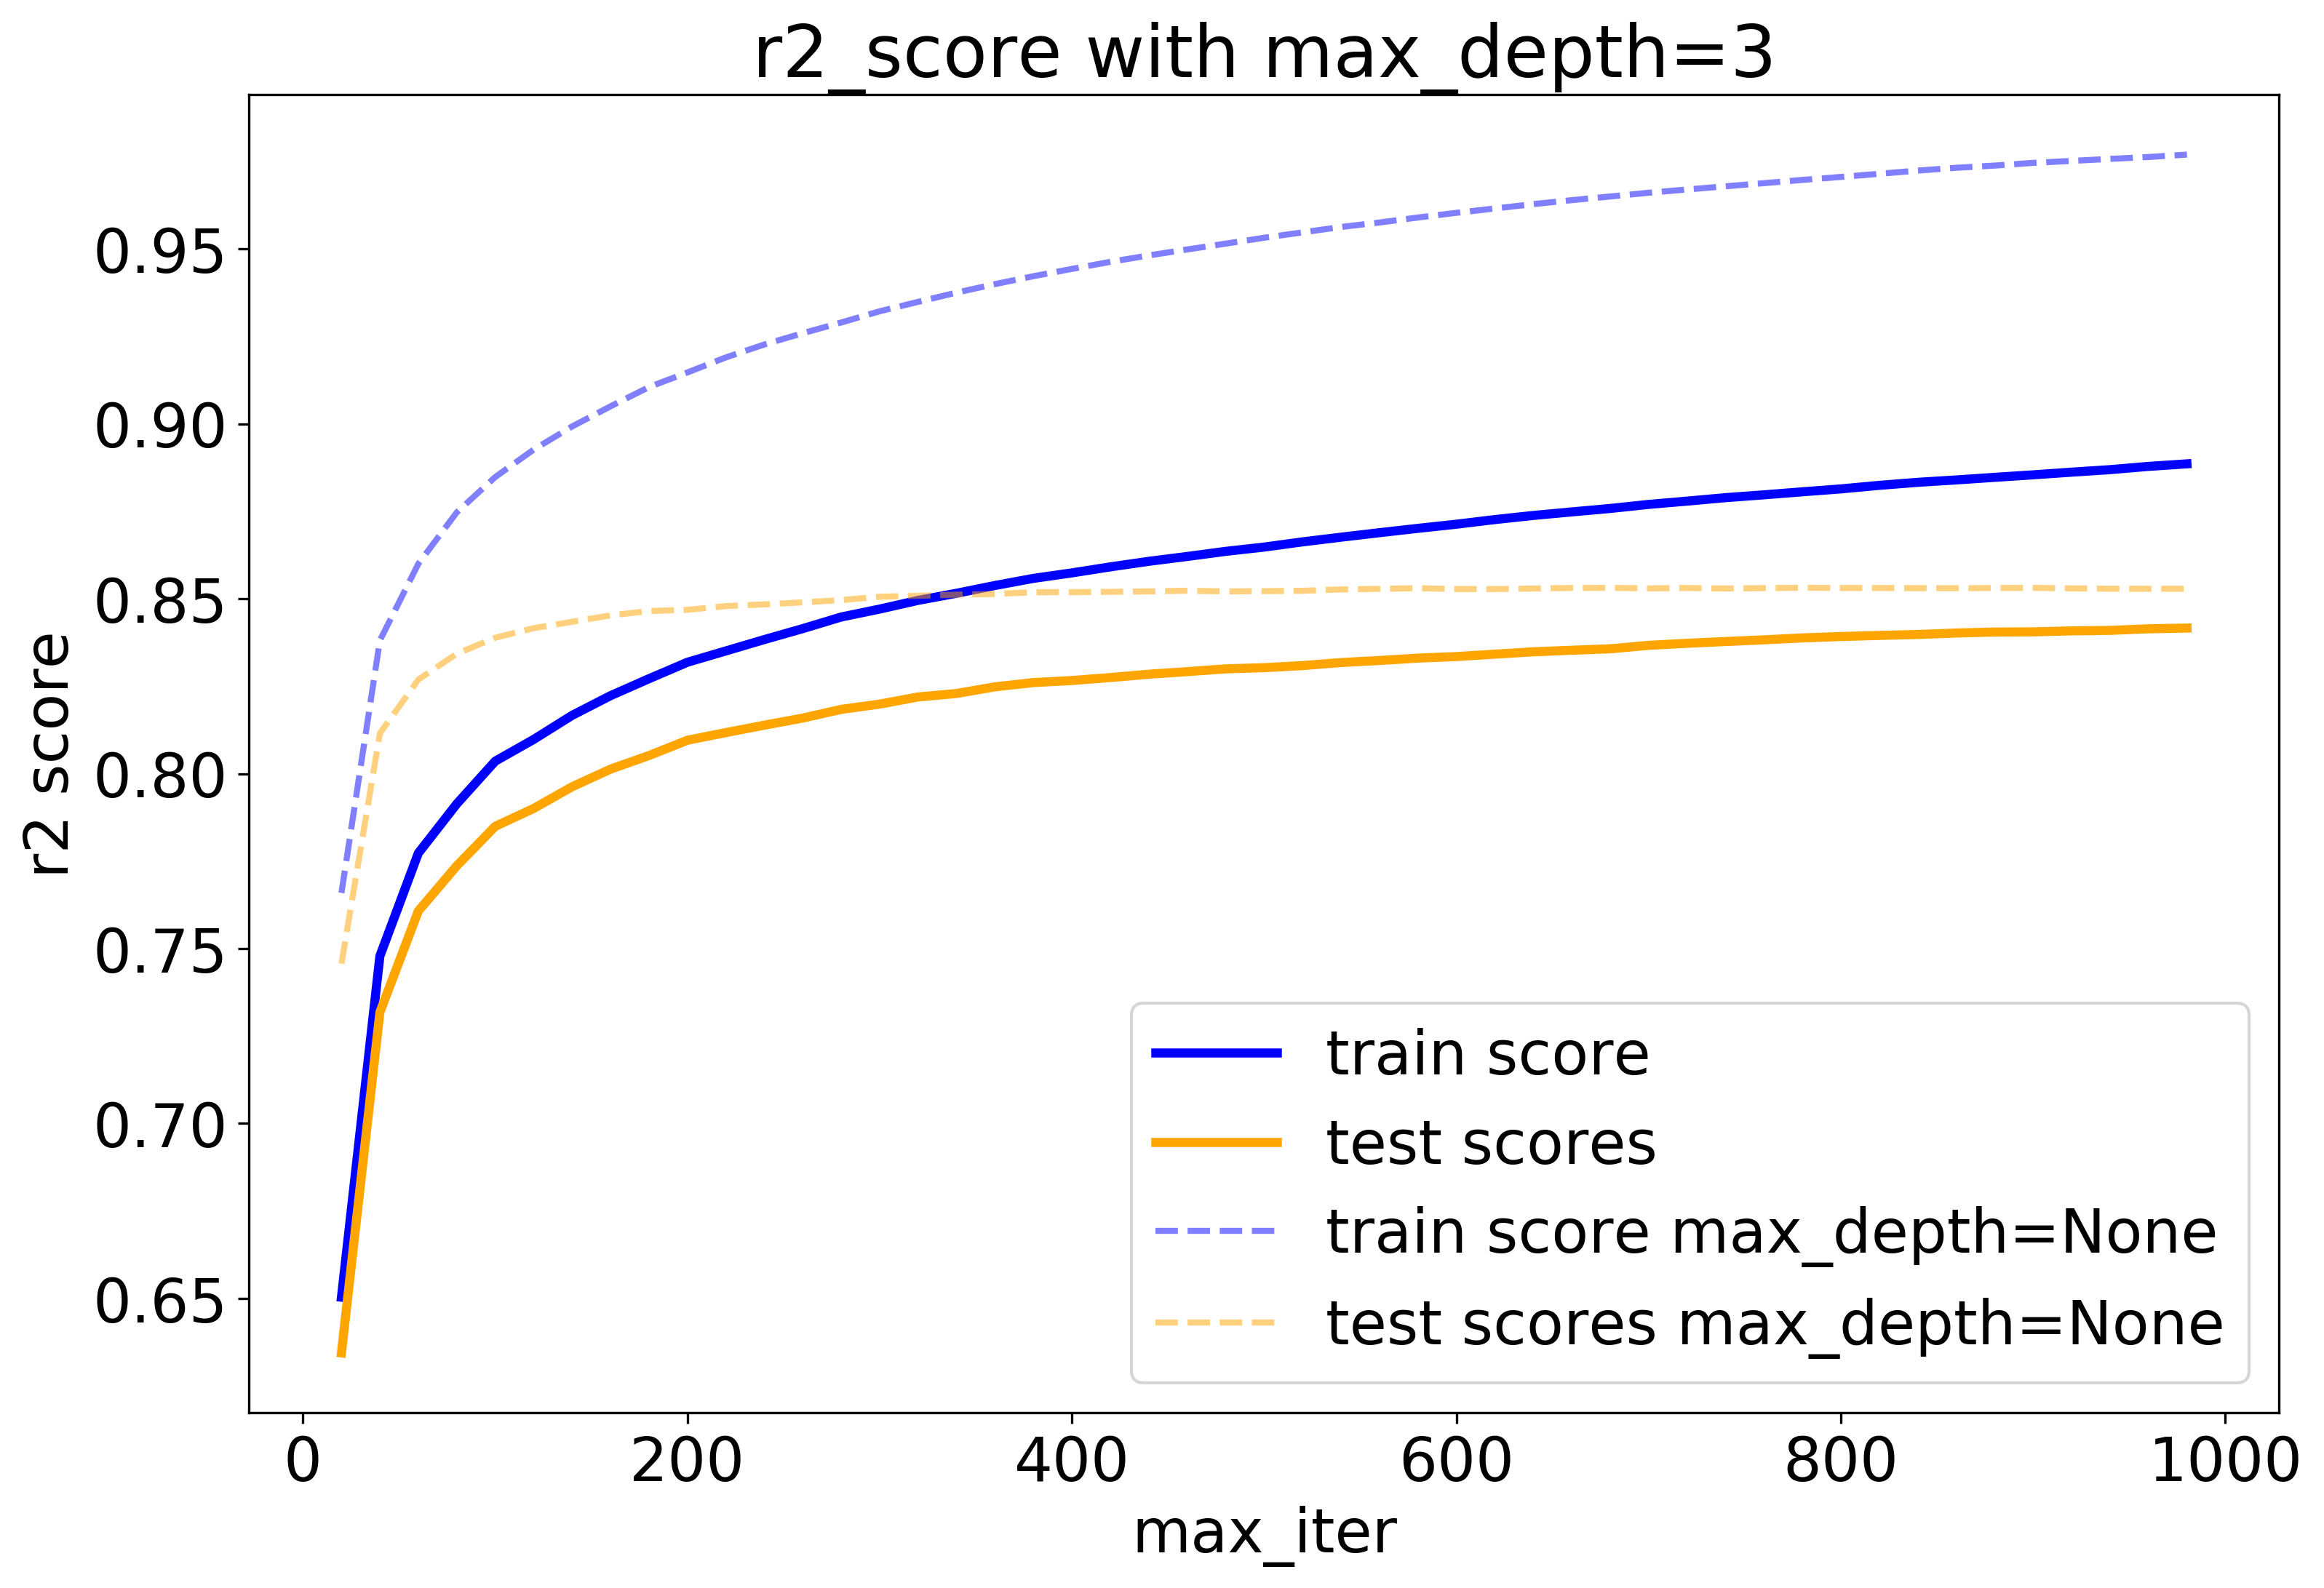

In [36]:
fig, ax = plot_scores('max_depth=3', 'max_depth=None')

In [37]:
fig.savefig("hyperp_max_depth_3.png", transparent=True)

## min_samples_leaf

In [38]:
train_model('min_samples_leaf=100', min_samples_leaf=100)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=980, max_leaf_nodes=31,
                              min_samples_leaf=100, n_iter_no_change=None,
                              random_state=42, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=True)

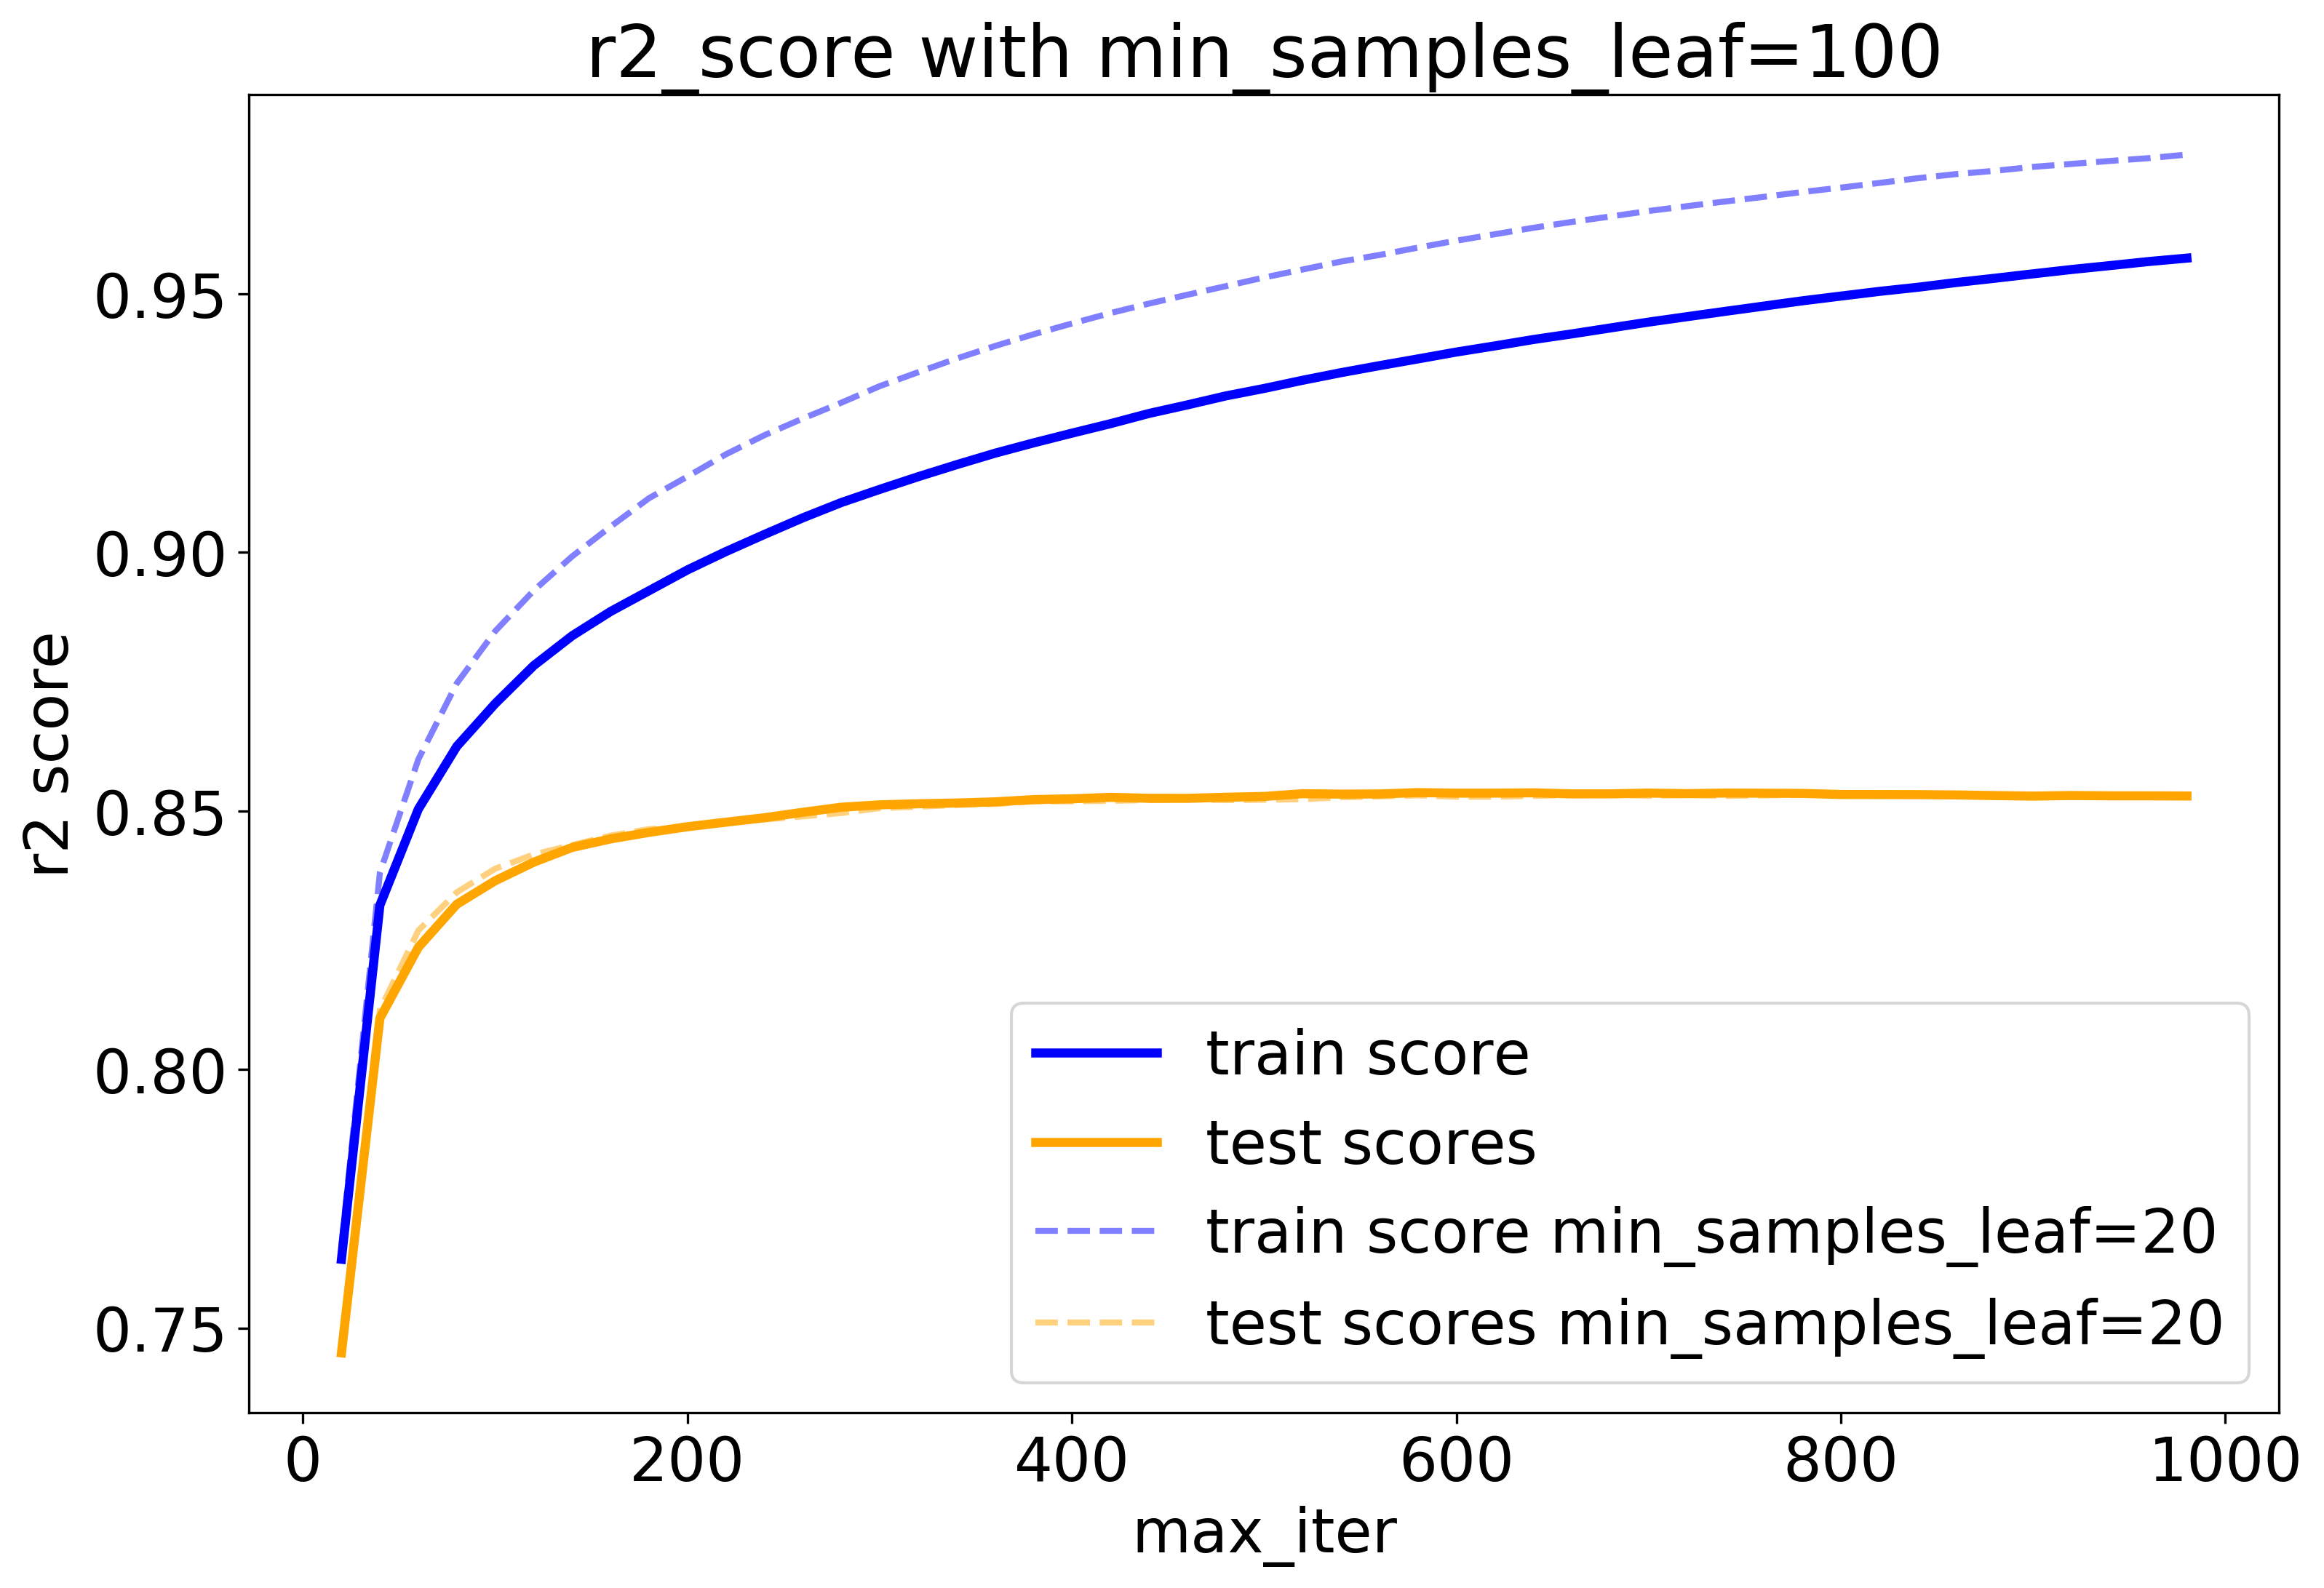

In [39]:
fig, ax = plot_scores('min_samples_leaf=100', 'min_samples_leaf=20')

In [40]:
fig.savefig("hyperp_min_samples_leaf_100.png", transparent=True)

## early stopping

## n_iter_no_change=10

In [41]:
hist = HistGradientBoostingRegressor(warm_start=True, n_iter_no_change=10,
                                     max_iter=1000, scoring='r2', random_state=42)
hist.fit(X, y)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=1000, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=10,
                              random_state=42, scoring='r2', tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=True)

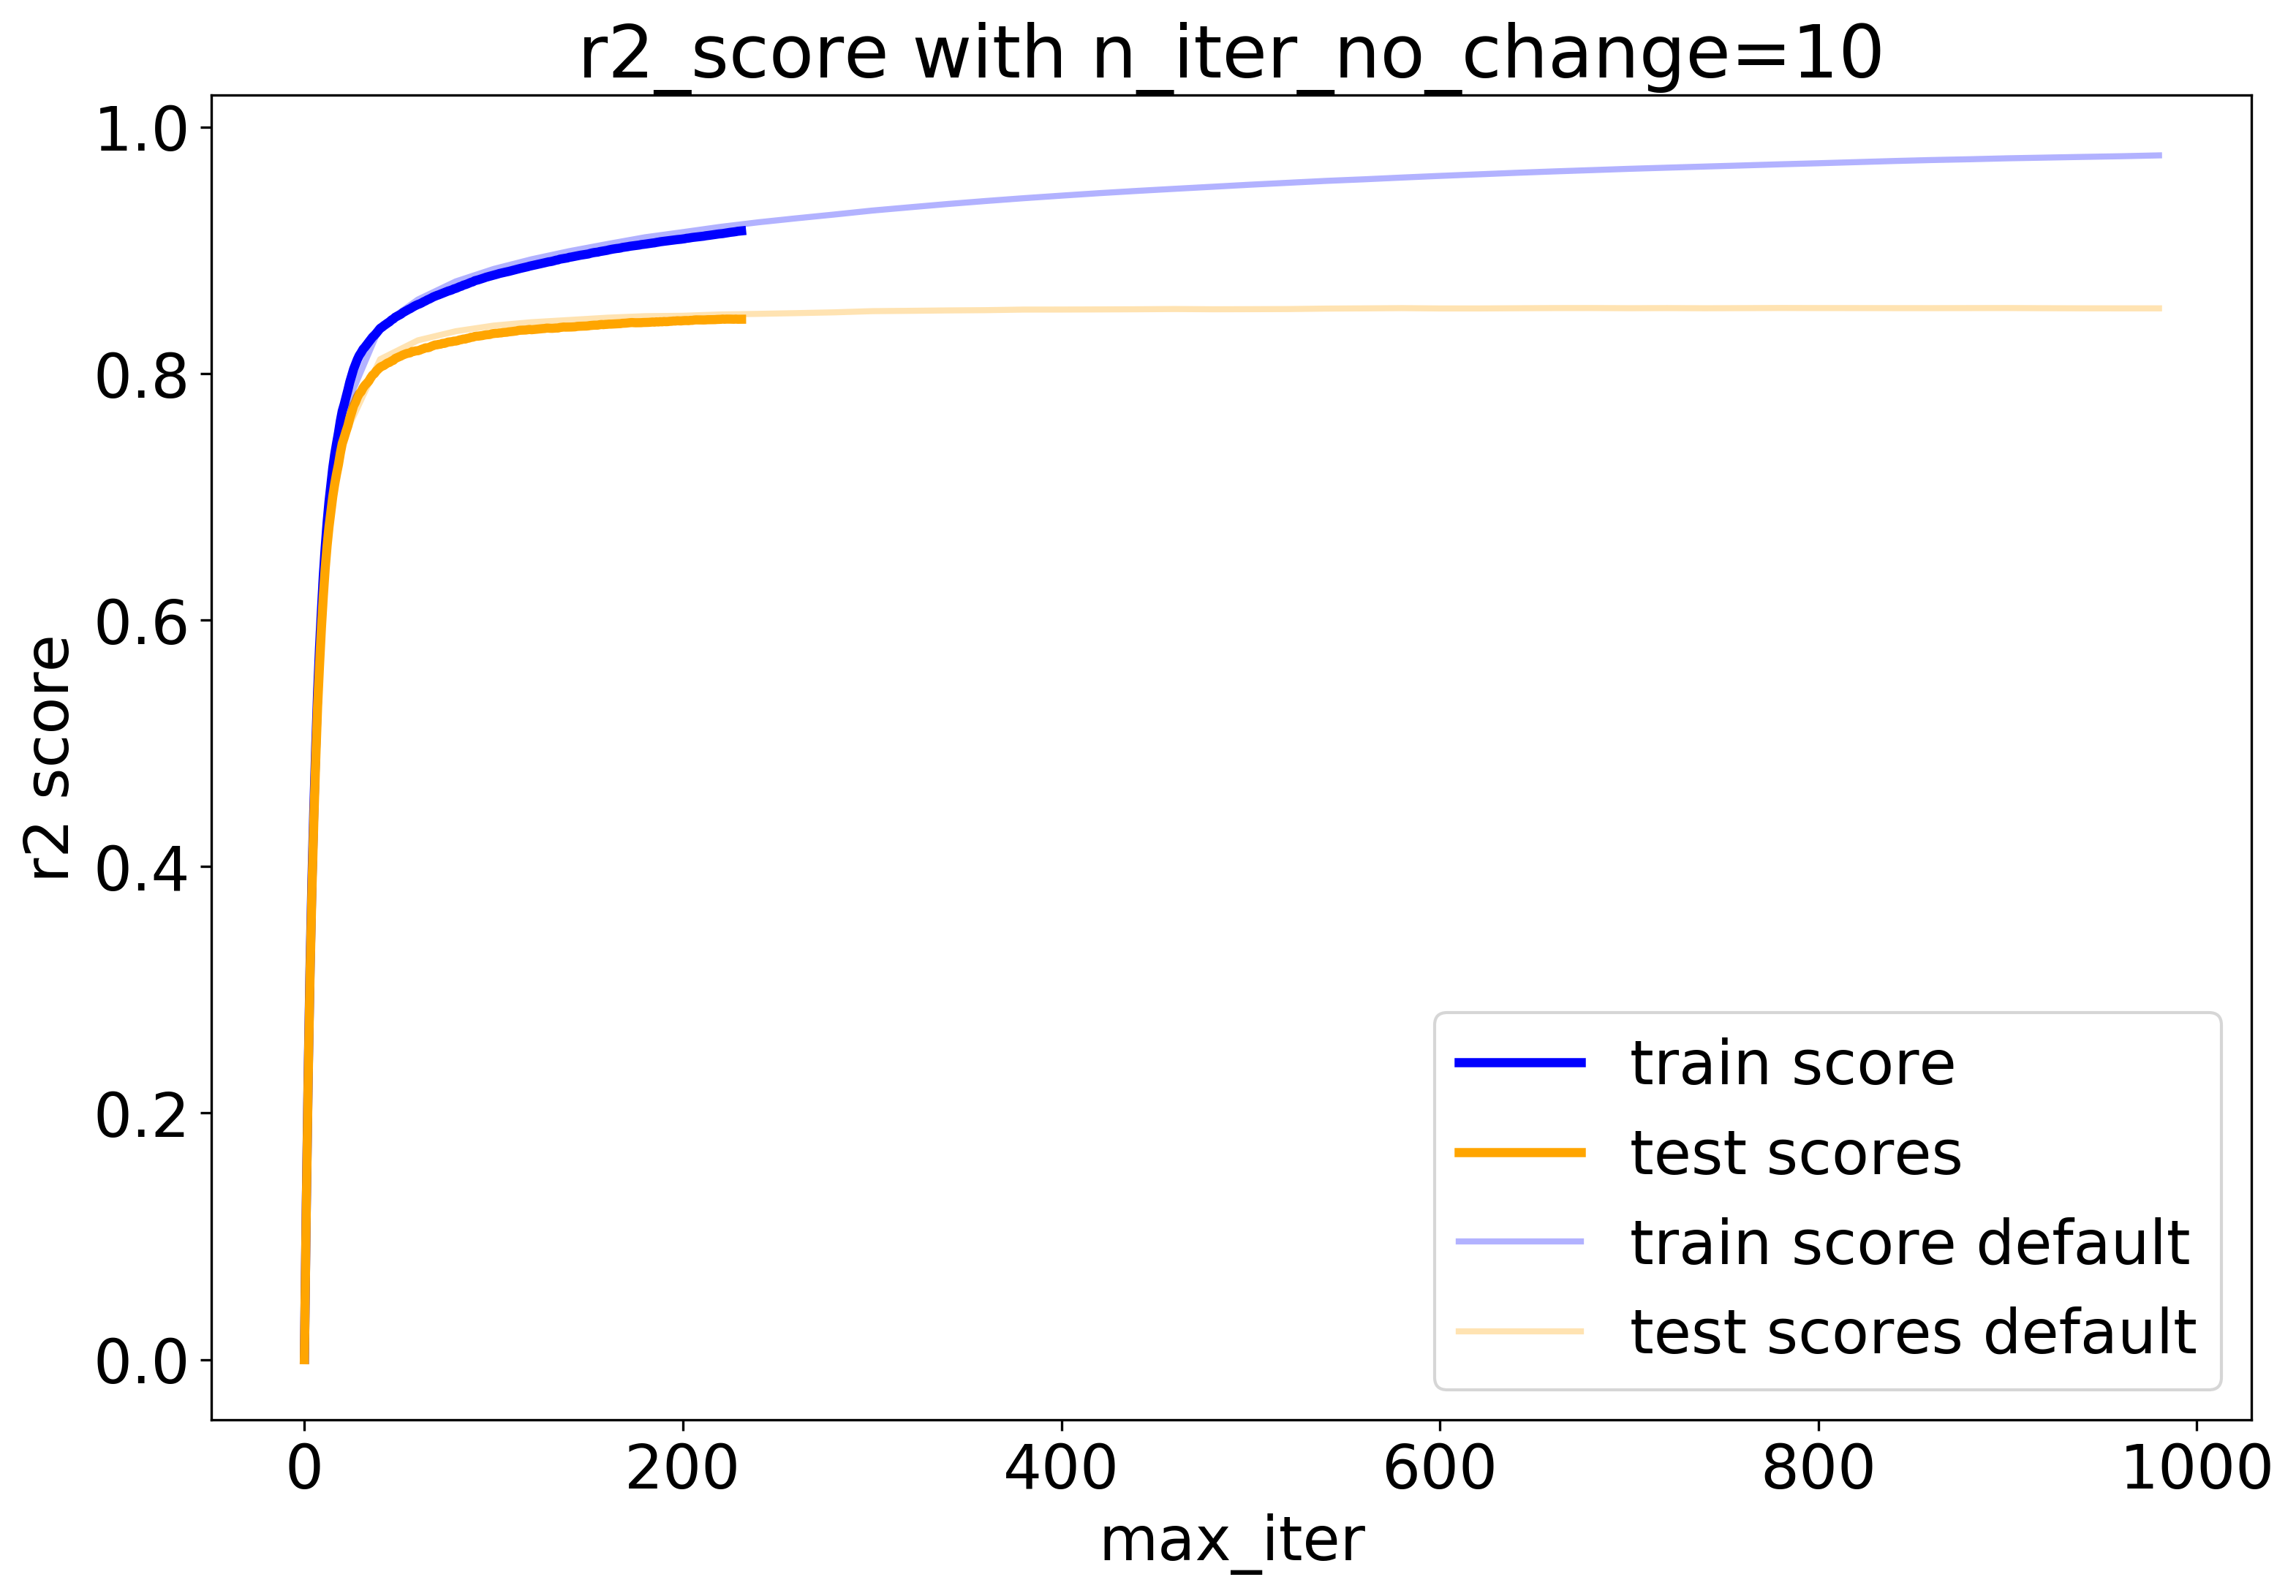

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

rounds_early = np.arange(0, hist.train_score_.shape[0])
ax.plot(rounds_early, hist.train_score_, label="train score", c='blue', lw=3)
ax.plot(rounds_early, hist.validation_score_, label="test scores", c='orange', lw=3)
ax.plot(rounds, train_scores['default'], label="train score default", c='blue', alpha=0.3, lw=2)
ax.plot(rounds, test_scores['default'], label="test scores default", c='orange', alpha=0.3, lw=2)
fig.set_dpi(300)
ax.legend()
_ = ax.set(xlabel="max_iter", ylabel="r2 score",
           title="r2_score with n_iter_no_change=10")

In [44]:
fig.savefig("hyperp_n_iter_no_change_10.png", transparent=True)

## tol=1e-2

In [45]:
hist_tol = HistGradientBoostingRegressor(warm_start=True, n_iter_no_change=10, tol=1e-2,
                                     max_iter=1000, scoring='r2', random_state=42)
hist_tol.fit(X, y)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=1000, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=10,
                              random_state=42, scoring='r2', tol=0.01,
                              validation_fraction=0.1, verbose=0,
                              warm_start=True)

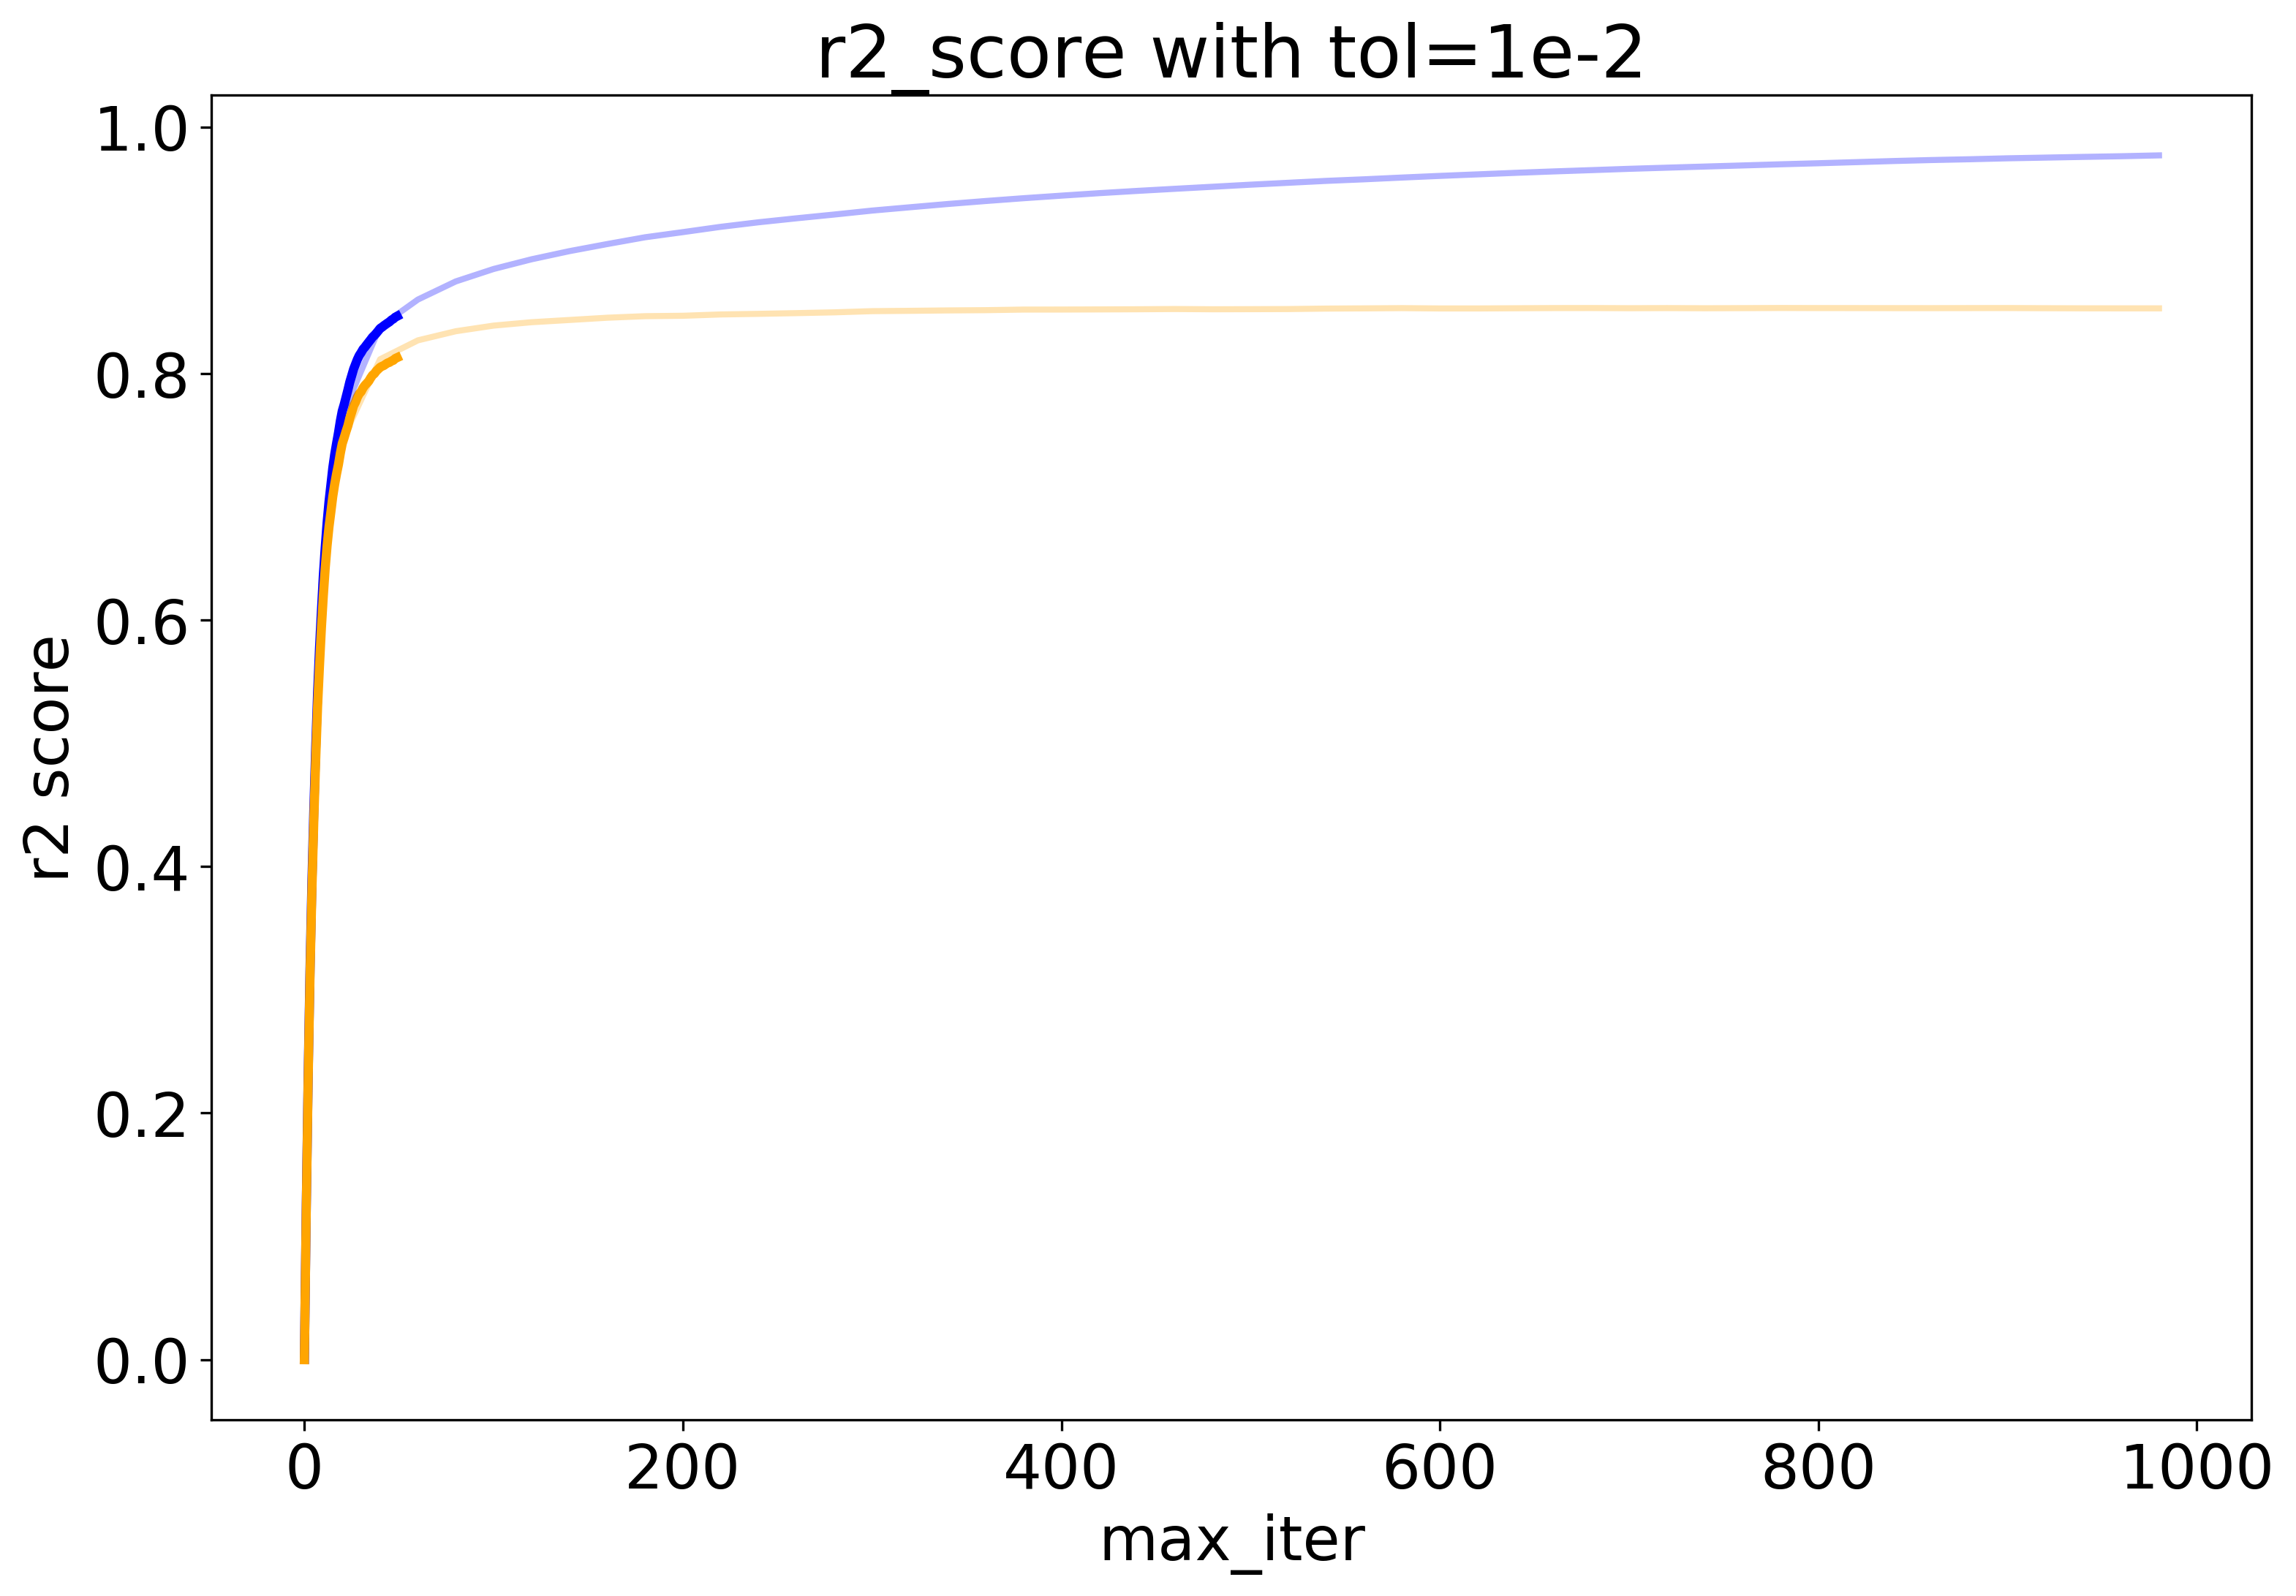

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

rounds_early = np.arange(0, hist_tol.train_score_.shape[0])
ax.plot(rounds_early, hist_tol.train_score_, label="train score", c='blue', lw=3)
ax.plot(rounds_early, hist_tol.validation_score_, label="test scores", c='orange', lw=3)
ax.plot(rounds, train_scores['default'], label="train score default", c='blue', alpha=0.3, lw=2)
ax.plot(rounds, test_scores['default'], label="test scores default", c='orange', alpha=0.3, lw=2)
fig.set_dpi(300)
_ = ax.set(xlabel="max_iter", ylabel="r2 score",
           title="r2_score with tol=1e-2")

In [47]:
fig.savefig("hyperp_tol_1e-2.png", transparent=True)

## Missing Values

In [167]:
# Need to install scikit-learn master
# pip install --pre -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn

from sklearn.datasets import make_classification
X, y = make_classification(random_state=42)

In [168]:
X[:10, 0] = np.nan

In [170]:
X[:11, :2]

array([[        nan,  0.0291022 ],
       [        nan,  0.65992405],
       [        nan,  0.95057302],
       [        nan, -0.32066954],
       [        nan, -0.22210005],
       [        nan,  0.80742726],
       [        nan,  0.67287309],
       [        nan,  0.12037048],
       [        nan,  2.35790248],
       [        nan, -0.56156012],
       [ 0.22468473, -1.01695056]])

In [172]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(random_state=42)

X[:10, 0] = np.nan

gbdt = HistGradientBoostingClassifier().fit(X, y)
print(gbdt.predict(X[:20]))

[0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1]
